# Question 1

In [59]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

circles_data, circles_data_labels = datasets.make_circles(
    n_samples=100, factor=0.1, noise=0.1
)


切割資料集

In [61]:
testing_data_mask = np.random.choice([True, False], len(circles_data), p=[0.30, 0.70])
testing_data, testing_labels = circles_data[testing_data_mask], circles_data_labels[testing_data_mask]

training_data_mask = list(map(lambda b: not b, testing_data_mask))
training_data, training_labels = circles_data[training_data_mask], circles_data_labels[training_data_mask]

建構模型

In [62]:
model = tf.keras.Sequential(
    [layers.Input(shape=(2,)), layers.Dense(2, activation="relu"), layers.Dense(1)]
)

model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam())


訓練模型

In [63]:
model.fit(x=training_data, y=training_labels, epochs=500, verbose=1)

test_loss = model.evaluate(x=testing_data, y=testing_labels)
print("Test loss: ", test_loss)

Epoch 1/500
3/3 [==============================] - 1s 3ms/step - loss: 0.6185
Epoch 2/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6097
Epoch 3/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6012
Epoch 4/500
3/3 [==============================] - 0s 2ms/step - loss: 0.5931
Epoch 5/500
3/3 [==============================] - 0s 3ms/step - loss: 0.5840
Epoch 6/500
3/3 [==============================] - 0s 4ms/step - loss: 0.5765
Epoch 7/500
3/3 [==============================] - 0s 2ms/step - loss: 0.5685
Epoch 8/500
3/3 [==============================] - 0s 2ms/step - loss: 0.5610
Epoch 9/500
3/3 [==============================] - 0s 3ms/step - loss: 0.5543
Epoch 10/500
3/3 [==============================] - 0s 3ms/step - loss: 0.5468
Epoch 11/500
3/3 [==============================] - 0s 4ms/step - loss: 0.5402
Epoch 12/500
3/3 [==============================] - 0s 3ms/step - loss: 0.5336
Epoch 13/500
3/3 [==============================] - 0s 5ms/st

製圖

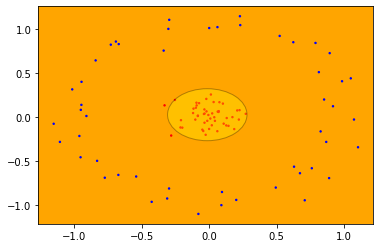

In [64]:
# 繪製區域圖
# 1. 取得模型預測點
predicted_y = model.predict(circles_data)
mask = list(map(lambda l: l[0]>=0.5, predicted_y))
inner_circle_points = circles_data[mask]

# 2. 計算圓心
center_x = sum(inner_circle_points[:,0])/len(inner_circle_points)
center_y = sum(inner_circle_points[:,1])/len(inner_circle_points)

# 3. 取中心至最遠點為半徑
distance_x_squared = np.square(np.subtract(inner_circle_points[:,0], center_x))
distance_y_squared = np.square(np.subtract(inner_circle_points[:,1], center_y))
distance_array = np.sqrt(np.add(distance_x_squared, distance_y_squared))
inner_circle_r = sum(distance_array)/len(distance_array)

# 4. 繪製圖
circle_plot = plt.Circle((center_x, center_y), inner_circle_r, facecolor="yellow", edgecolor="black", alpha=0.3)
fig = plt.gcf()
ax = plt.gca()
ax.add_patch(circle_plot)

# 繪製資料點圖
color_array = list(map(lambda l: "red" if l>=0.5 else "blue", circles_data_labels))
plt.scatter(x=circles_data[:,0], y=circles_data[:,1], c=color_array, s=2)
ax.set_facecolor("orange")

